## Recitation Summary 

#### During our recitation, the class discussed what factors can impact the shape of the implied volatility curve. 

#### 1. Far out of the money options will be difficult to solve for because of the very small sensitivity of vega. 

#### 2. The value used for the interest rate parameter can impact price. It should be close to the Fed Funds rate. 

#### 3. The price used for the numerical routine matters! 

#### 4. The last price is noisy because some options can be illiquid, thus their price does not reflect the current market. 

#### 5. The midpoint may not always be the most reliable. This is because far out of the money options may not have a "true" bid. 

#### 6. There are many numerical procedures to solve for implied volatility. Popular methods include bisection and Newton like methods, but there exist other alternatives such as taylor series expansions. 

In [18]:
import numpy as np 
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import date, datetime

In [19]:
def d1(S, K, T, r, sigma):
    
    return (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    
    return d1(S, K, T, r, sigma) - sigma * np.sqrt(T)

In [20]:
def bisection_ivol(Price, S, K, T, r):
        
    N = 1000
    tol = 1e-7
    count = 0    
    lower_bound = 0.10
    upper_bound = 1.00
        
    while(count < N):
        
        sigma = (lower_bound + upper_bound) / 2
        Price_implied = S * norm.cdf(d1(S, K, T, r, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))
        
        # Market Price - Iterative Price
        diff = Price - Price_implied 
        
        if np.abs(diff) < tol: 
            return sigma
        
        # Iterative Price too High
        if diff < 0: 
            upper_bound = (sigma + upper_bound) / 2
        
        # Iterative Price too Low
        if diff > 0: 
            lower_bound = (sigma + lower_bound) / 2
        
        count += 1
    
    return 0

In [21]:
ticker = "AMZN"
AMZN = yf.Ticker(ticker)
exp_date = AMZN.options
print(exp_date)

('2023-02-17', '2023-02-24', '2023-03-03', '2023-03-10', '2023-03-17', '2023-03-24', '2023-04-21', '2023-06-16', '2023-07-21', '2023-09-15', '2023-10-20', '2024-01-19', '2024-03-15', '2024-06-21', '2024-09-20', '2025-01-17', '2025-06-20', '2025-12-19')


In [22]:
date_object = parser.parse(exp_date[10])

print(date_object.date()) 
opt = AMZN.option_chain(str(date_object.date()))
calls = opt.calls
puts = opt.puts

2023-10-20


In [23]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN231020C00045000,2023-01-27 14:45:00+00:00,45.0,57.50,54.30,54.85,0.000000,0.000000,1,5,0.741946,True,REGULAR,USD
1,AMZN231020C00050000,2023-02-07 20:30:01+00:00,50.0,54.11,49.70,50.25,0.000000,0.000000,2,56,0.693362,True,REGULAR,USD
2,AMZN231020C00055000,2023-02-01 19:53:50+00:00,55.0,52.44,45.20,45.65,0.000000,0.000000,1,12,0.647953,True,REGULAR,USD
3,AMZN231020C00060000,2023-02-08 16:24:37+00:00,60.0,42.30,40.70,41.25,0.000000,0.000000,1,389,0.607792,True,REGULAR,USD
4,AMZN231020C00065000,2023-02-09 20:43:47+00:00,65.0,37.00,36.40,36.95,0.000000,0.000000,1,359,0.573613,True,REGULAR,USD
5,AMZN231020C00070000,2023-02-06 14:52:41+00:00,70.0,37.10,32.30,32.75,0.000000,0.000000,1,239,0.543095,True,REGULAR,USD
6,AMZN231020C00075000,2023-02-02 15:56:51+00:00,75.0,41.22,28.35,28.75,0.000000,0.000000,12,438,0.515630,True,REGULAR,USD
7,AMZN231020C00080000,2023-02-09 16:02:12+00:00,80.0,26.75,24.65,25.05,0.000000,0.000000,1,361,0.501531,True,REGULAR,USD
8,AMZN231020C00085000,2023-02-10 14:49:58+00:00,85.0,21.87,21.15,21.55,-0.269999,-1.219506,1,485,0.479619,True,REGULAR,USD
9,AMZN231020C00090000,2023-02-09 20:54:31+00:00,90.0,18.90,17.95,18.30,0.000000,0.000000,4,630,0.459539,True,REGULAR,USD


In [24]:
today = date.today()

prices = yf.download(ticker, 
                   start='2020-01-01', 
                   end=today, 
                   progress=False, auto_adjust=True)

S = prices['Close'][-1]

In [25]:
print("Stock Price: ", S)

Stock Price:  97.61000061035156


In [26]:
amzn_T = ((date_object.date() - today).days / 252)
r = 0.045

## Implied Volatility Bid 

In [27]:
bid_ivol = []
index = 0

for bid_price in calls["bid"]: 
    
    ivol = bisection_ivol(bid_price, S, calls["strike"][index], amzn_T, r)
    
    if ivol != 0:
        bid_ivol.append(ivol)
        
    index += 1

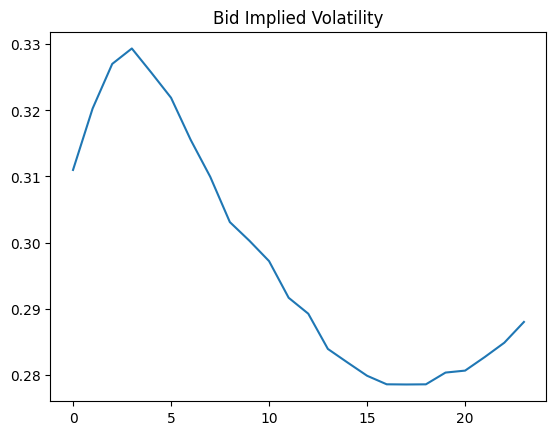

In [28]:
plt.plot(bid_ivol)
plt.title("Bid Implied Volatility")
plt.show()

## Implied Volatility Ask

In [29]:
ask_ivol = []
index = 0

for ask_price in calls["ask"]: 
    
    ivol = bisection_ivol(ask_price, S, calls["strike"][index], amzn_T, r)
    
    if ivol != 0:
        ask_ivol.append(ivol)
        
    index += 1

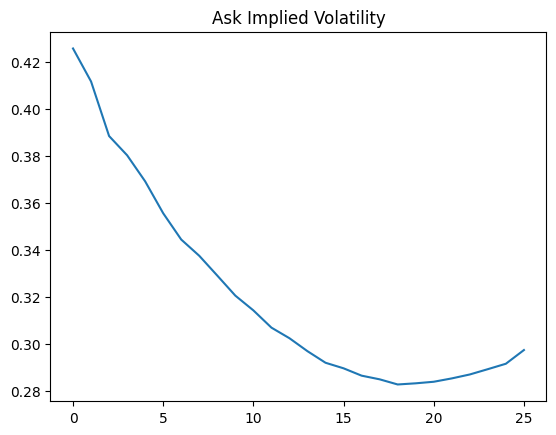

In [30]:
plt.plot(ask_ivol)
plt.title("Ask Implied Volatility")
plt.show()

## Implied Volatility Midpoint

In [31]:
mid_ivol = []
index = 0

for i in range(len(calls["ask"])): 
    
    midpoint = (calls["bid"][i] + calls["ask"][i]) / 2.0
    
    ivol = bisection_ivol(midpoint, S, calls["strike"][index], amzn_T, r)
    
    if ivol != 0:
        mid_ivol.append(ivol)
        
    index += 1

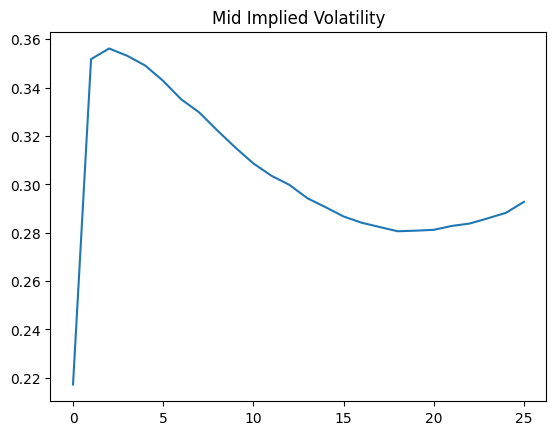

In [32]:
plt.plot(mid_ivol)
plt.title("Mid Implied Volatility")
plt.show()

## Implied Volatility Last Price

In [33]:
last_ivol = []
index = 0

for last_price in calls["lastPrice"]: 
    
    ivol = bisection_ivol(last_price, S, calls["strike"][index], amzn_T, r)
    
    if ivol != 0:
        last_ivol.append(ivol)
        
    index += 1

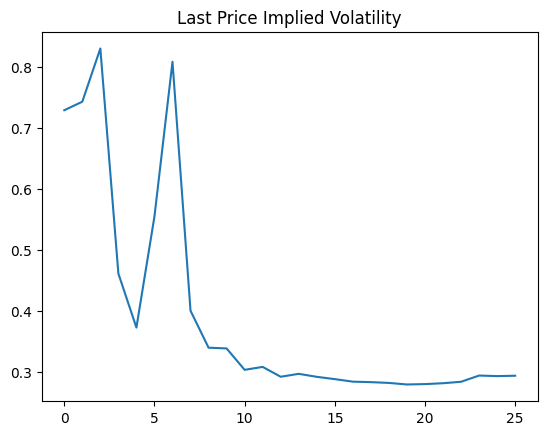

In [34]:
plt.plot(last_ivol)
plt.title("Last Price Implied Volatility")
plt.show()